In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import logging
import requests
import datetime as dt
import pylab

import scipy.stats as stats
from matplotlib import pyplot

import numpy as np

import warnings
warnings.filterwarnings('ignore')

logging.getLogger().setLevel(logging.INFO)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import os, sys

home = os.environ["HOME"]
sys.path.append(f"{home}/Desktop/project-ursa/lib")

import imp

In [2]:
import data_utils
import monte_carlo
import machine_npv
import implied_payback_time
import mining_constants
import delta_hedge
import machine_replication
import analysis

imp.reload(data_utils)
imp.reload(monte_carlo)
imp.reload(machine_npv)
imp.reload(mining_constants)
imp.reload(implied_payback_time)
imp.reload(delta_hedge)
imp.reload(machine_replication)
imp.reload(analysis)

<module 'analysis' from '/Users/merkle-employee/Desktop/project-ursa/lib/analysis.py'>

In [3]:
machine_params   = mining_constants.machine_params()
machine_duration = 1.0
ky = "M20"
params = {
    "asic_energy_consumption" : machine_params[ky]["energy_consumption"],
    "asic_hash_rate"          : machine_params[ky]["hash_rate"],
    "electricity_cost"        : 0.05,
    "machine_duration"        : 1.0,
    "sample_rate"             : mining_constants.SAMPLE_RATE_WEEKLY,
    "mc_size"                 : 1000,
    "interest_rate"           : 0.05,
    "asic_number"             : 1,
    "asic_efficiency"         : 1.0,
    "pool_fee"                : 0.005,
    "analysis_denomination"   : mining_constants.ASSET_USD
}

In [4]:
##
du = data_utils.DataUtility("cc_key")
du._raw_network_price_df = pd.read_csv("../../data/raw_network_price.csv").drop("Unnamed: 0", axis="columns")
du._raw_network_price_df.time = pd.to_datetime(du._raw_network_price_df.time)
du._df_feature( ) 
du._aggregate_weekly_df( ) 

daily_df  = du._daily_network_price_df
weekly_df = du._weekly_network_price_df


In [5]:
# - - - - - weekly_df.head()

In [6]:
## 
sp = monte_carlo.GBMPriceLinearHashRate()
sp.fit(weekly_df, sample_rate=mining_constants.SAMPLE_RATE_WEEKLY)

In [35]:
## 
k = 253#len(weekly_df) - 1

start_time = weekly_df.reset_index().loc[k, "time"]
hash_rate  = weekly_df.reset_index().loc[k, "hashrate"]
hash_index = weekly_df.reset_index().loc[k, "hash_index"]
btc_close  = weekly_df.reset_index().loc[k, "close"]
(len(weekly_df), k,  start_time, btc_close)

(285, 253, datetime.date(2022, 9, 9), 19771.787142857145)

In [36]:
res_lst = []

for s in np.linspace(10000, 60000, 10):

    m_usd_bsm = machine_npv.MachineNPV_USD_BSM(sp, params)
    usd_bsm   = m_usd_bsm.price(start_time, s, hash_rate)

    m_usd_bin = machine_npv.MachineNPV_USD_Bin(sp, params)
    usd_bin   = m_usd_bin.price(start_time, s, hash_rate, 100)

    m_btc_bin = machine_npv.MachineNPV_BTC_Bin(sp, params)
    btc_bin   = m_btc_bin.price(start_time, s, hash_rate, 100)
    
    tmp = {
        "spot": s,
        "usd_bsm": usd_bsm,
        "usd_bin": usd_bin,
        "btc_bin": btc_bin,
        "usd_delta_1" : (m_usd_bin._option_df["call_delta"] * m_usd_bin._option_df["reward"]).sum(),
        "usd_delta_2" : (m_usd_bsm._option_df["call_delta"] * m_usd_bsm._option_df["reward"]).sum(),        
        "btc_delta" : (m_btc_bin._option_df["call_delta"] * m_btc_bin._option_df["reward"]).sum(),        
    }
    
    logging.info(tmp)
    res_lst.append(tmp)

INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52
steps  52


INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52


INFO:root:{'spot': 10000.0, 'usd_bsm': 30.86889121851223, 'usd_bin': 30.78647650821398, 'btc_bin': 0.0011491981052746724, 'usd_delta_1': 0.013724595885496831, 'usd_delta_2': 0.08739483155655707, 'btc_delta': 5.03414921569477e-07}
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52
steps  52


INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52


INFO:root:{'spot': 15555.555555555555, 'usd_bsm': 192.89367346826148, 'usd_bin': 193.05627579302293, 'btc_bin': 0.006939057525795541, 'usd_delta_1': 0.046925602806785184, 'usd_delta_2': 0.08739483155655707, 'btc_delta': 1.632961106409873e-06}
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52
steps  52


INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52


INFO:root:{'spot': 21111.11111111111, 'usd_bsm': 527.2574047517867, 'usd_bin': 527.3452428482391, 'btc_bin': 0.017238699782724038, 'usd_delta_1': 0.06965245438784917, 'usd_delta_2': 0.08739483155655707, 'btc_delta': 1.8785599424442627e-06}
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52
steps  52


INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52


INFO:root:{'spot': 26666.666666666668, 'usd_bsm': 941.5115937441261, 'usd_bin': 941.5049449210807, 'btc_bin': 0.026859101790265582, 'usd_delta_1': 0.07823544022906748, 'usd_delta_2': 0.08739483155655707, 'btc_delta': 1.5697912619654375e-06}
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52
steps  52


INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52


INFO:root:{'spot': 32222.222222222223, 'usd_bsm': 1387.545657927281, 'usd_bin': 1387.5329091800454, 'btc_bin': 0.03465397287098997, 'usd_delta_1': 0.08188907737973408, 'usd_delta_2': 0.08739483155655707, 'btc_delta': 1.2473352289674624e-06}
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52
steps  52


INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52


INFO:root:{'spot': 37777.77777777778, 'usd_bsm': 1847.6993712616843, 'usd_bin': 1847.630820987363, 'btc_bin': 0.04083051408224607, 'usd_delta_1': 0.08359401088528082, 'usd_delta_2': 0.08739483155655707, 'btc_delta': 9.89493401068713e-07}
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52
steps  52


INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52


INFO:root:{'spot': 43333.333333333336, 'usd_bsm': 2314.6590828004273, 'usd_bin': 2314.5720500301445, 'btc_bin': 0.04575635971764042, 'usd_delta_1': 0.08444578261862921, 'usd_delta_2': 0.08739483155655707, 'btc_delta': 7.936711689130761e-07}
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52
steps  52


INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52


INFO:root:{'spot': 48888.88888888889, 'usd_bsm': 2785.114001221125, 'usd_bin': 2785.03261965955, 'btc_bin': 0.04973621318339148, 'usd_delta_1': 0.08489494340665062, 'usd_delta_2': 0.08739483155655707, 'btc_delta': 6.457532000985176e-07}
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52
steps  52


INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52


INFO:root:{'spot': 54444.444444444445, 'usd_bsm': 3257.4581150923805, 'usd_bin': 3257.38956849623, 'btc_bin': 0.05299834831215996, 'usd_delta_1': 0.08514291496577088, 'usd_delta_2': 0.08739483155655707, 'btc_delta': 5.330664967719187e-07}
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799
INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52
steps  52


INFO:root:simulate: T = 1.0 sample_rate = 52 => steps = 52 vol-scale(52/52) vol 0.0873135992840332 => 0.0873135992840332 mu 0.005344673686849799 = > 0.005344673686849799


steps  52


INFO:root:{'spot': 60000.0, 'usd_bsm': 3730.867664046104, 'usd_bin': 3730.808737100647, 'btc_bin': 0.055709757798738296, 'usd_delta_1': 0.08528526704991397, 'usd_delta_2': 0.08739483155655707, 'btc_delta': 4.460759540736063e-07}


Text(0, 0.5, 'BTC Value')

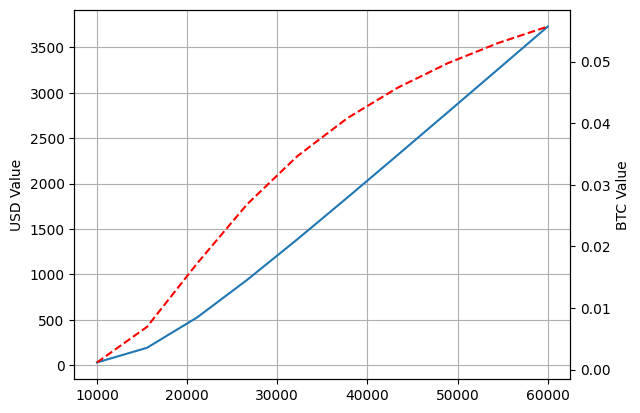

In [37]:
df = pd.DataFrame(res_lst)

fig, ax = plt.subplots()
ax.plot(df.spot, df.usd_bsm, '-')
ax.grid()
ax.set_ylabel("USD Value")
ax1 = ax.twinx()
ax1.plot(df.spot, df.btc_bin, color="r", ls='--')
ax1.set_ylabel("BTC Value")


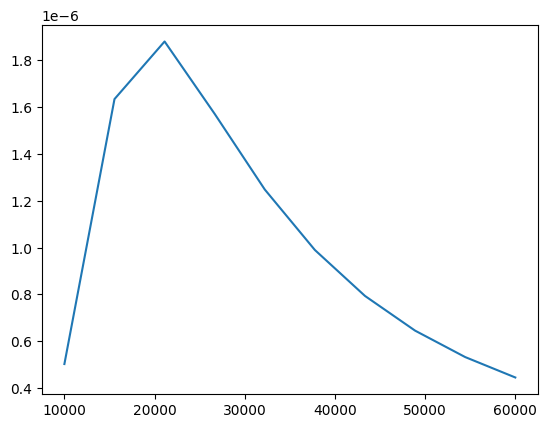

In [44]:
# plt.plot(df.spot, df.usd_delta_1, '-')

# plt.plot(df.spot, df.usd_delta_2, '-')
plt.plot(df.spot, df.btc_delta, '-')